In [1]:
import pandas as pd

In [2]:
cd C:/Users/nobuh/Google Drive/M1/Research/Experiments/Data/Cleaned/Complete/ML

C:\Users\nobuh\Google Drive\M1\Research\Experiments\Data\Cleaned\Complete\ML


In [3]:
dataset = pd.read_csv('training.csv')

In [4]:
dataset.shape

(3302, 13)

In [5]:
dataset

,Class,tag1,tag2,tag3,tag4,tag24,tag25,tag26,tag27,tag1ps,tag2ps,tag3ps,tag4ps
0,1,2577.5,2400.6,2278.90,2554.333333,818.9,572.6,1243.3,499.7,0,0,0,0
1,1,2611.7,2439.7,2278.90,2561.333333,791.1,572.2,1254.3,514.1,0,0,0,0
2,1,2611.7,2439.7,2248.50,2559.400000,796.4,555.0,1269.5,525.4,0,0,0,0
3,1,2609.3,2375.1,2280.20,2559.400000,817.1,570.7,1269.5,525.4,0,0,0,0
4,1,2671.5,2351.3,2280.20,2523.600000,822.8,570.7,1265.3,517.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,3,2734.6,2712.3,2519.80,2782.200000,0.0,0.0,0.0,0.0,0,0,0,0
3298,3,2685.1,2405.5,3505.05,2775.533333,0.0,0.0,0.0,0.0,0,0,0,0
3299,3,2713.8,2729.1,3505.05,2767.866667,0.0,0.0,0.0,0.0,0,0,0,0
3300,3,2836.9,2852.4,2595.60,2669.933333,0.0,0.0,0.0,0.0,0,0,0,0


In [6]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2972, 13)
Unseen Data For Predictions: (330, 13)


In [7]:
print(data)

      Class    tag1     tag2     tag3         tag4  tag24  tag25   tag26  \
0         1  2609.2  2449.10  2336.60  2544.800000  793.0  528.1  1303.2   
1         2  1658.7  1375.85   780.50  2415.333333    0.0  583.7  1318.1   
2         1  2704.9  2467.00  2303.80  2482.800000  812.4  562.5  1266.5   
3         1  2630.7  2452.80  2244.00  2587.600000  828.3  598.0  1282.4   
4         2  2640.1  2942.60  2369.60  2357.266667  766.0  553.6  1268.3   
...     ...     ...      ...      ...          ...    ...    ...     ...   
2967      1  2653.1  2431.60  2298.50  2504.266667  827.7  585.2  1252.2   
2968      2  1542.2     0.00  4817.85  3312.733333  572.6  591.9  1200.9   
2969      3  2857.7  3294.70  3042.50  2747.700000  560.4    0.0     0.0   
2970      3  2500.1  2732.20  2145.50  2536.466667    0.0    0.0  1122.3   
2971      1  2659.2  2453.20  2292.00  2565.466667  813.6  571.0  1302.1   

      tag27  tag1ps  tag2ps  tag3ps  tag4ps  
0     495.2       0       0       0      

In [8]:
from pycaret.classification import *

In [9]:
exp_mclf101 = setup(data = data, target = 'Class', categorical_imputation= 'mode',
                    session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(2972, 13)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
exp_mclf101 = setup(data = data, target = 'Class', categorical_imputation= 'mode',
                    session_id=123, numeric_features=["tag1ps", "tag2ps", "tag3ps", "tag4ps"])

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.9885,0,0.9885,0.9887,0.9885,0.9827
1,Random Forest Classifier,0.9851,0,0.9851,0.9853,0.9851,0.9776
2,Extra Trees Classifier,0.9846,0,0.9846,0.985,0.9846,0.9769
3,CatBoost Classifier,0.9837,0,0.9837,0.9841,0.9836,0.9755
4,Ada Boost Classifier,0.9803,0,0.9803,0.9807,0.9803,0.9704
5,Extreme Gradient Boosting,0.9779,0,0.9779,0.9788,0.9778,0.9668
6,Gradient Boosting Classifier,0.9769,0,0.9769,0.9775,0.9769,0.9654
7,Decision Tree Classifier,0.9712,0,0.9712,0.972,0.9709,0.9567
8,K Neighbors Classifier,0.9543,0,0.9544,0.9566,0.954,0.9315
9,Logistic Regression,0.8471,0,0.8474,0.8903,0.8373,0.7704


In [20]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9843,0.0,0.9846,0.9845,0.9843,0.9764
1,0.9738,0.0,0.9749,0.9748,0.9738,0.9606
2,0.9791,0.0,0.9807,0.9803,0.9791,0.9685
3,0.9895,0.0,0.9900,0.9895,0.9895,0.9842
4,0.9579,0.0,0.9598,0.9610,0.9578,0.9367
5,0.9947,0.0,0.9952,0.9948,0.9947,0.9921
6,0.9737,0.0,0.9747,0.9737,0.9737,0.9604
7,0.9947,0.0,0.9952,0.9948,0.9947,0.9921
8,0.9842,0.0,0.9855,0.9849,0.9842,0.9763
9,0.9684,0.0,0.9706,0.9696,0.9684,0.9525


In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9808,0.0,0.9807,0.9814,0.9807,0.9712
1,0.9808,0.0,0.9806,0.9812,0.9808,0.9711
2,0.9856,0.0,0.9858,0.9856,0.9856,0.9784
3,0.9808,0.0,0.9805,0.9808,0.9808,0.9711
4,0.9760,0.0,0.9759,0.9762,0.9760,0.9639
5,0.9808,0.0,0.9810,0.9814,0.9807,0.9712
6,0.9856,0.0,0.9856,0.9858,0.9856,0.9784
7,0.9856,0.0,0.9857,0.9856,0.9856,0.9784
8,0.9952,0.0,0.9952,0.9953,0.9952,0.9928
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000


In [13]:
print(rf)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [14]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9372,0.0,0.9381,0.9386,0.9375,0.9055
1,0.9267,0.0,0.9305,0.9333,0.9260,0.8900
2,0.9791,0.0,0.9804,0.9794,0.9791,0.9685
3,0.9421,0.0,0.9456,0.9434,0.9413,0.9131
4,0.9158,0.0,0.9192,0.9199,0.9153,0.8734
5,0.9632,0.0,0.9662,0.9660,0.9629,0.9447
6,0.9421,0.0,0.9451,0.9445,0.9422,0.9130
7,0.9211,0.0,0.9268,0.9248,0.9194,0.8817
8,0.9316,0.0,0.9372,0.9416,0.9308,0.8974
9,0.9368,0.0,0.9417,0.9416,0.9360,0.9052


In [66]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9552,0.0,0.9538,0.9554,0.9550,0.9327
1,0.9627,0.0,0.9612,0.9632,0.9623,0.9439
2,0.9627,0.0,0.9603,0.9647,0.9620,0.9439
3,0.9552,0.0,0.9529,0.9560,0.9546,0.9327
4,0.9552,0.0,0.9512,0.9590,0.9545,0.9325
5,0.9254,0.0,0.9280,0.9365,0.9252,0.8883
6,0.9403,0.0,0.9350,0.9461,0.9386,0.9100
7,0.9701,0.0,0.9696,0.9713,0.9702,0.9552
8,0.9478,0.0,0.9431,0.9548,0.9472,0.9213
9,0.9248,0.0,0.9208,0.9265,0.9230,0.8868


In [21]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9738,0.0,0.9727,0.9747,0.9739,0.9606
1,0.9738,0.0,0.9749,0.9748,0.9738,0.9606
2,0.9843,0.0,0.9855,0.9850,0.9843,0.9764
3,0.9842,0.0,0.9851,0.9843,0.9842,0.9763
4,0.9579,0.0,0.9598,0.9610,0.9578,0.9367
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,0.9737,0.0,0.9747,0.9737,0.9737,0.9604
7,0.9895,0.0,0.9903,0.9898,0.9895,0.9842
8,0.9895,0.0,0.9903,0.9898,0.9895,0.9842
9,0.9737,0.0,0.9755,0.9744,0.9737,0.9604


In [12]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9808,0.0,0.9807,0.9818,0.9807,0.9711
1,0.9760,0.0,0.9757,0.9764,0.9760,0.9639
2,0.9856,0.0,0.9858,0.9856,0.9856,0.9784
3,0.9856,0.0,0.9854,0.9856,0.9856,0.9784
4,0.9712,0.0,0.9711,0.9716,0.9712,0.9567
5,0.9904,0.0,0.9905,0.9907,0.9904,0.9856
6,0.9808,0.0,0.9808,0.9812,0.9808,0.9711
7,0.9904,0.0,0.9903,0.9905,0.9904,0.9856
8,0.9952,0.0,0.9952,0.9953,0.9952,0.9928
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000


In [23]:
tuned_knn = tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9476,0.0,0.9487,0.9479,0.9477,0.9213
1,0.9424,0.0,0.9459,0.9474,0.9419,0.9136
2,0.9738,0.0,0.9755,0.9745,0.9738,0.9606
3,0.9895,0.0,0.9902,0.9896,0.9894,0.9842
4,0.9316,0.0,0.9339,0.9345,0.9317,0.8971
5,0.9684,0.0,0.9710,0.9700,0.9681,0.9526
6,0.9474,0.0,0.9499,0.9483,0.9472,0.9209
7,0.9474,0.0,0.9513,0.9498,0.9466,0.9210
8,0.9158,0.0,0.9220,0.9237,0.9149,0.8737
9,0.9421,0.0,0.9465,0.9478,0.9420,0.9131


In [24]:
tuned_svm = tune_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8220,0.0,0.8260,0.8289,0.8214,0.7316
1,0.7853,0.0,0.8001,0.8473,0.7687,0.6796
2,0.7853,0.0,0.8019,0.8684,0.7657,0.6792
3,0.8684,0.0,0.8761,0.8853,0.8648,0.8026
4,0.7947,0.0,0.8065,0.8332,0.7822,0.6925
5,0.6263,0.0,0.6329,0.4787,0.5309,0.4310
6,0.6526,0.0,0.6560,0.4857,0.5418,0.4701
7,0.6263,0.0,0.6336,0.5433,0.5414,0.4318
8,0.6421,0.0,0.6463,0.4830,0.5370,0.4543
9,0.6263,0.0,0.6329,0.4637,0.5232,0.4315


In [13]:
print(tuned_rf)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=7,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [26]:
print(tuned_lightgbm)

OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.2, max_depth=30,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0, n_estimators=100,
                                             n_jobs=-1, num_leaves=70,
                                             objective=None, random_state=123,
                                             reg_alpha=0.1, reg_lambda=0.5,
                                             silent=True, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0),
   

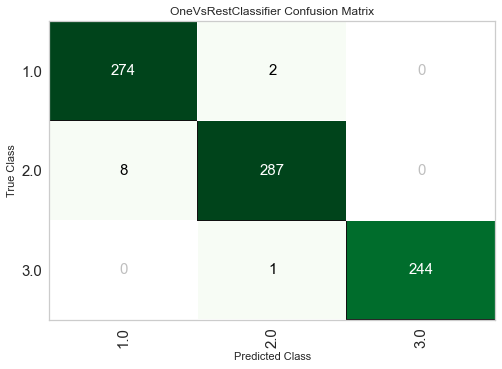

In [27]:
plot_lightgbm = plot_model(tuned_lightgbm, plot = 'confusion_matrix')

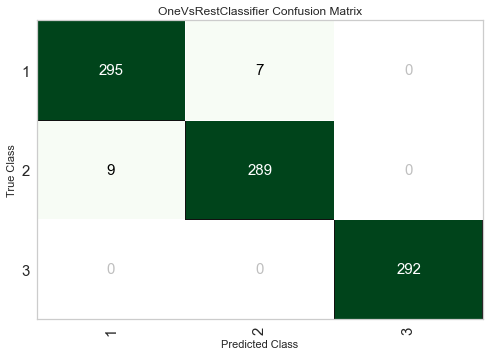

In [14]:
plot_rf = plot_model(tuned_rf, plot = 'confusion_matrix')

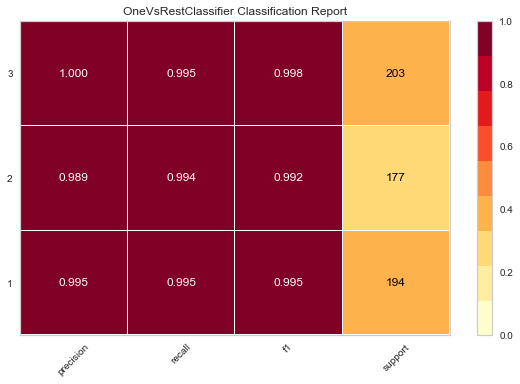

In [89]:
plot_knn = plot_model(tuned_knn, plot = 'class_report')

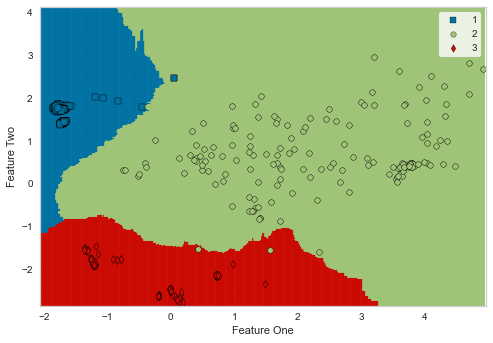

In [91]:
plot_et = plot_model(tuned_et, plot='boundary')

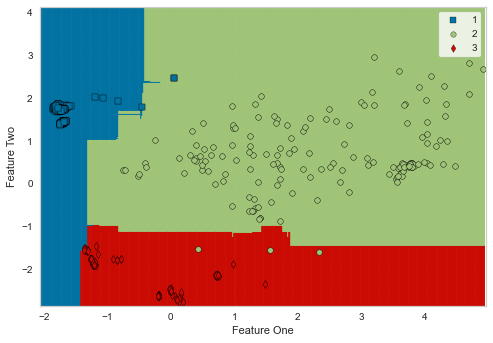

In [92]:
plot_rf_boundary = plot_model(tuned_rf, plot='boundary')

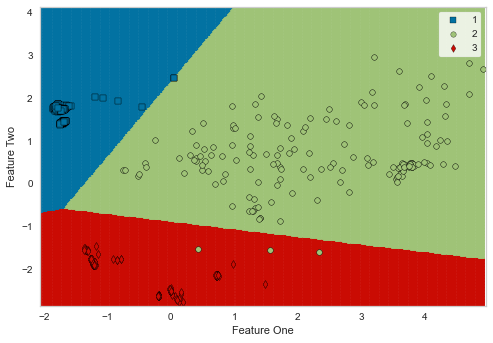

In [93]:
plot_svm = plot_model(tuned_svm, plot='boundary')

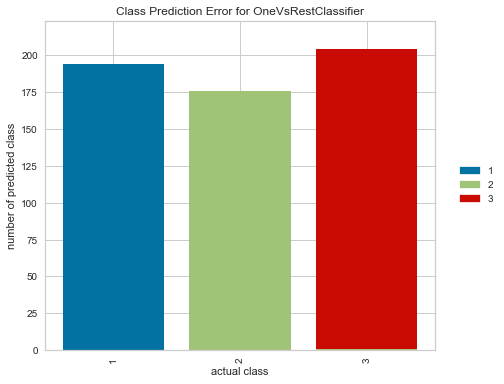

In [97]:
plot_et_error = plot_model(tuned_et, plot = 'error')

In [29]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
final_lightbgm = finalize_model(tuned_lightgbm)

In [35]:
print(final_lightbgm)

OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.2, max_depth=30,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0, n_estimators=100,
                                             n_jobs=-1, num_leaves=70,
                                             objective=None, random_state=123,
                                             reg_alpha=0.1, reg_lambda=0.5,
                                             silent=True, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0),
   

In [15]:
final_rf = finalize_model(tuned_rf)

In [16]:
print(final_rf)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=7,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [38]:
final_knn = finalize_model(tuned_knn)

In [39]:
print(final_knn)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=3,
                                                   p=2, weights='uniform'),
                    n_jobs=None)


In [40]:
final_svm = finalize_model(tuned_svm)

In [41]:
print(final_svm)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0005, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.3, fit_intercept=False,
                                            l1_ratio=0.6,
                                            learning_rate='adaptive',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l1', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)


In [21]:
evaluate_model(final_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
predict_model(final_lightbgm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,1.0,0,1.0,1.0,1.0,1.0


In [17]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9989,0,0.9989,0.9989,0.9989,0.9983


In [44]:
predict_model(final_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9853,0,0.9864,0.9859,0.9853,0.9779


In [45]:
predict_model(final_svm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.6091,0,0.6179,0.4775,0.5216,0.4061


In [18]:
unseen_predictions = predict_model(final_lightbgm, data=data_unseen)
unseen_predictions.head(213)

NameError: name 'final_lightbgm' is not defined

In [20]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions

,Class,tag1,tag2,tag3,tag4,tag24,tag25,tag26,tag27,tag1ps,tag2ps,tag3ps,tag4ps,Label
0,3,3021.0,3311.5,3170.80,2709.000000,0.0,0.0,0.0,0.0,0,0,0,0,3
1,3,3037.2,3329.3,3138.80,2713.700000,0.0,0.0,0.0,0.0,0,0,0,0,3
2,3,3056.1,3331.7,3174.70,2713.700000,0.0,0.0,0.0,0.0,0,0,0,0,3
3,3,3060.0,3331.7,3175.50,2681.800000,0.0,0.0,0.0,0.0,0,0,0,0,3
4,3,3083.3,3325.8,3203.70,2671.100000,0.0,0.0,0.0,0.0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,3,2734.6,2712.3,2519.80,2782.200000,0.0,0.0,0.0,0.0,0,0,0,0,3
326,3,2685.1,2405.5,3505.05,2775.533333,0.0,0.0,0.0,0.0,0,0,0,0,3
327,3,2713.8,2729.1,3505.05,2767.866667,0.0,0.0,0.0,0.0,0,0,0,0,3
328,3,2836.9,2852.4,2595.60,2669.933333,0.0,0.0,0.0,0.0,0,0,0,0,3


In [126]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,Class,tag max,tag wall max,tag ps max,tag max-min,tag wall max-min,tag ndr,tag wall ndr,Label
0,3,12071.2,0.0,0,12071.2,0.0,16,0,3
1,3,12021.0,0.0,0,343.8,0.0,20,0,3
2,3,12021.9,0.0,0,327.1,0.0,20,0,3
3,3,11989.8,0.0,0,249.8,0.0,20,0,3
4,3,11944.3,0.0,0,267.9,0.0,20,0,3


In [127]:
unseen_predictions = predict_model(final_svm, data=data_unseen)
unseen_predictions.head()

,Class,tag max,tag wall max,tag ps max,tag max-min,tag wall max-min,tag ndr,tag wall ndr,Label
0,3,12071.2,0.0,0,12071.2,0.0,16,0,3
1,3,12021.0,0.0,0,343.8,0.0,20,0,3
2,3,12021.9,0.0,0,327.1,0.0,20,0,3
3,3,11989.8,0.0,0,249.8,0.0,20,0,3
4,3,11944.3,0.0,0,267.9,0.0,20,0,3


In [48]:
save_model(final_lightbgm,'Final Monitoring Data Extra Trees Model 1June2020')

Transformation Pipeline and Model Succesfully Saved


In [49]:
save_model(final_rf,'Final Monitoring Data Random Forest Model 1June2020')

Transformation Pipeline and Model Succesfully Saved


In [46]:
save_model(final_knn,'Final Monitoring Data KNN Model 1June2020')

Transformation Pipeline and Model Succesfully Saved


In [47]:
save_model(final_svm,'Final Monitoring Data SVM 1June2020')

Transformation Pipeline and Model Succesfully Saved


In [50]:
new_dataset = pd.read_csv('test data.csv')

In [51]:
saved_final_rf = load_model('Final Monitoring Data Random Forest Model 1June2020')

Transformation Pipeline and Model Sucessfully Loaded


In [63]:
new_prediction = predict_model(saved_final_rf, data=new_dataset)

In [64]:
new_prediction

,Class,tag1,tag2,tag3,tag4,tag24,tag25,tag26,tag27,tag1ps,tag2ps,tag3ps,tag4ps,Label
0,1.0,2561.6,2400.6,2274.0,2554.333333,818.9,572.6,1243.3,499.7,0.0,0.0,0.0,0.0,1
1,1.0,2609.3,2400.6,2278.9,2561.333333,811.8,572.2,1243.3,488.8,0.0,0.0,0.0,0.0,1
2,1.0,2611.7,2439.7,2278.9,2561.333333,791.1,572.2,1254.3,514.1,0.0,0.0,0.0,0.0,1
3,1.0,2611.7,2439.7,2248.5,2559.400000,796.4,555.0,1269.5,525.4,0.0,0.0,0.0,0.0,1
4,1.0,2609.3,2375.1,2263.4,2559.400000,796.4,534.6,1269.5,525.4,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,3.0,2621.9,2482.5,2370.9,2467.666667,672.2,535.5,1192.6,539.1,0.0,0.0,0.0,0.0,2
1056,3.0,2612.4,2510.3,2339.5,2466.400000,672.2,516.0,1265.7,539.1,0.0,0.0,0.0,0.0,2
1057,3.0,2637.5,2510.3,2343.6,2441.466667,636.6,516.0,1265.7,535.1,0.0,0.0,0.0,0.0,2
1058,3.0,2652.1,2508.7,2343.6,2441.466667,641.2,546.2,1211.6,544.8,0.0,0.0,0.0,0.0,2


In [58]:
new_prediction.to_csv("test data result.csv", index=False,header=True)

In [59]:
evaluate_model(final_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…